# EDA

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "./data/"
df_train = pd.read_csv(data_path + "train.csv")
df_test = pd.read_csv(data_path + "test.csv")

id_column = "ID_LAT_LON_YEAR_WEEK"
target_column = "emission"
#df_train.drop('id', axis=1, inplace=True)

#df_train['date'] = pd.to_datetime(df_train['date'])

df_train.head(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
5,ID_-0.510_29.290_2019_05,-0.51,29.29,2019,5,0.000294,0.871713,0.000242,0.227656,-13.453690,...,5530.354546,49846.001010,4495.301362,7.556143,0.250228,30.128401,37.007020,-137.388719,21.157820,4.310819
6,ID_-0.510_29.290_2019_06,-0.51,29.29,2019,6,-0.000285,0.791956,-0.000226,0.119397,72.198647,...,4378.614648,58804.276563,3537.050659,10.493107,0.240828,4.585368,30.491541,-128.196338,21.721202,4.269334
7,ID_-0.510_29.290_2019_07,-0.51,29.29,2019,7,-0.000016,0.976311,-0.000016,0.106799,-100.956055,...,3468.924146,63697.007267,2597.071563,20.533600,0.250168,16.374829,35.840248,-122.250699,20.432005,4.251361
8,ID_-0.510_29.290_2019_08,-0.51,29.29,2019,8,-0.000115,0.796941,-0.000101,0.164971,-40.179074,...,3160.264670,67222.556159,2530.851476,24.253928,0.260543,-12.021751,42.688789,-114.296369,22.365602,4.281937
9,ID_-0.510_29.290_2019_09,-0.51,29.29,2019,9,0.000056,0.998541,0.000014,0.157726,-100.108744,...,4141.073340,60298.717969,3510.293652,13.813379,0.289295,-66.258392,28.596211,-105.687177,21.084021,4.352933


In [42]:
# check if there are any null values
df_train.isnull().sum()

null_sum = df_train.isnull().sum()

# change into dataframe
null_sum = pd.DataFrame(null_sum, columns=['count'])
null_sum['percentage_empty'] = null_sum['count'] / len(df_train) * 100
null_sum.sort_values(by='count', ascending=False).head(30)

,count,percentage_empty
UvAerosolLayerHeight_aerosol_height,78584,99.444466
UvAerosolLayerHeight_solar_zenith_angle,78584,99.444466
UvAerosolLayerHeight_solar_azimuth_angle,78584,99.444466
UvAerosolLayerHeight_sensor_azimuth_angle,78584,99.444466
UvAerosolLayerHeight_aerosol_pressure,78584,99.444466
UvAerosolLayerHeight_aerosol_optical_depth,78584,99.444466
UvAerosolLayerHeight_sensor_zenith_angle,78584,99.444466
NitrogenDioxide_tropopause_pressure,18320,23.183124
NitrogenDioxide_stratospheric_NO2_column_number_density,18320,23.183124
NitrogenDioxide_NO2_slant_column_number_density,18320,23.183124


substances found in dataset

- Sulphur Dioxide - COPERNICUS/S5P/NRTI/L3_SO2
- Carbon Monoxide - COPERNICUS/S5P/NRTI/L3_CO
- Nitrogen Dioxide - COPERNICUS/S5P/NRTI/L3_NO2
- Formaldehyde - COPERNICUS/S5P/NRTI/L3_HCHO
- UV Aerosol Index - COPERNICUS/S5P/NRTI/L3_AER_AI
- Ozone - COPERNICUS/S5P/NRTI/L3_O3
- Cloud - COPERNICUS/S5P/OFFL/L3_CLOUD




In [43]:
sulphur_dioxide = "SulphurDioxide"
carbon_monoxide = "CarbonMonoxide"
nitrogen_dioxide = "NitrogenDioxide"
formaldehyde = "Formaldehyde"
ozone = "Ozone"
cloud = "Cloud"
uv_aerosol = "UvAerosol"

all_cols = set(df_train.columns)

sulphur_dioxide_cols = {col for col in all_cols if sulphur_dioxide in col}
carbon_monoxide_cols = {col for col in all_cols if carbon_monoxide in col}
nitrogen_dioxide_cols = {col for col in all_cols if nitrogen_dioxide in col}
formaldehyde_cols = {col for col in all_cols if formaldehyde in col}
ozone_cols = {col for col in all_cols if ozone in col}
cloud_cols = {col for col in all_cols if cloud in col}
uv_aerosol = {col for col in all_cols if uv_aerosol in col}

cols_left = all_cols - sulphur_dioxide_cols - carbon_monoxide_cols - nitrogen_dioxide_cols - formaldehyde_cols - ozone_cols - cloud_cols - uv_aerosol

cols_dict = {
    "Sulphur Dioxide (SO2)": sulphur_dioxide_cols,
    "Carbon Monoxide (CO)": carbon_monoxide_cols,
    "Nitrogen Dioxide (NO2)": nitrogen_dioxide_cols,
    "Formaldehyde (HCHO)": formaldehyde_cols,
    "Ozone (O3)": ozone_cols,
    "Cloud": cloud_cols,
    "UV Aerosol": uv_aerosol,
}

for k, v in cols_dict.items():
    print(f"{k} columns:")
    [ print(i) for i in v]
    print("--------------------")

Sulphur Dioxide (SO2) columns:
SulphurDioxide_SO2_slant_column_number_density
SulphurDioxide_SO2_column_number_density_amf
SulphurDioxide_solar_zenith_angle
SulphurDioxide_sensor_azimuth_angle
SulphurDioxide_sensor_zenith_angle
SulphurDioxide_SO2_column_number_density_15km
SulphurDioxide_cloud_fraction
SulphurDioxide_SO2_column_number_density
SulphurDioxide_solar_azimuth_angle
--------------------
Carbon Monoxide (CO) columns:
CarbonMonoxide_sensor_altitude
CarbonMonoxide_sensor_zenith_angle
CarbonMonoxide_sensor_azimuth_angle
CarbonMonoxide_H2O_column_number_density
CarbonMonoxide_cloud_height
CarbonMonoxide_CO_column_number_density
CarbonMonoxide_solar_zenith_angle
CarbonMonoxide_solar_azimuth_angle
--------------------
Nitrogen Dioxide (NO2) columns:
NitrogenDioxide_absorbing_aerosol_index
NitrogenDioxide_tropospheric_NO2_column_number_density
NitrogenDioxide_NO2_slant_column_number_density
NitrogenDioxide_stratospheric_NO2_column_number_density
NitrogenDioxide_sensor_zenith_angle
N

# plot emissions

In [44]:
df_train['emission'].describe()

count    79023.000000
mean        81.940552
std        144.299648
min          0.000000
25%          9.797995
50%         45.593445
75%        109.549595
max       3167.768000
Name: emission, dtype: float64

In [45]:
df_train

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [46]:
df0 = df_train.copy()
# drop ID_LAT_LON_YEAR_WEEK
df0.drop(columns=[id_column], inplace=True)

c:\Users\Wiktor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


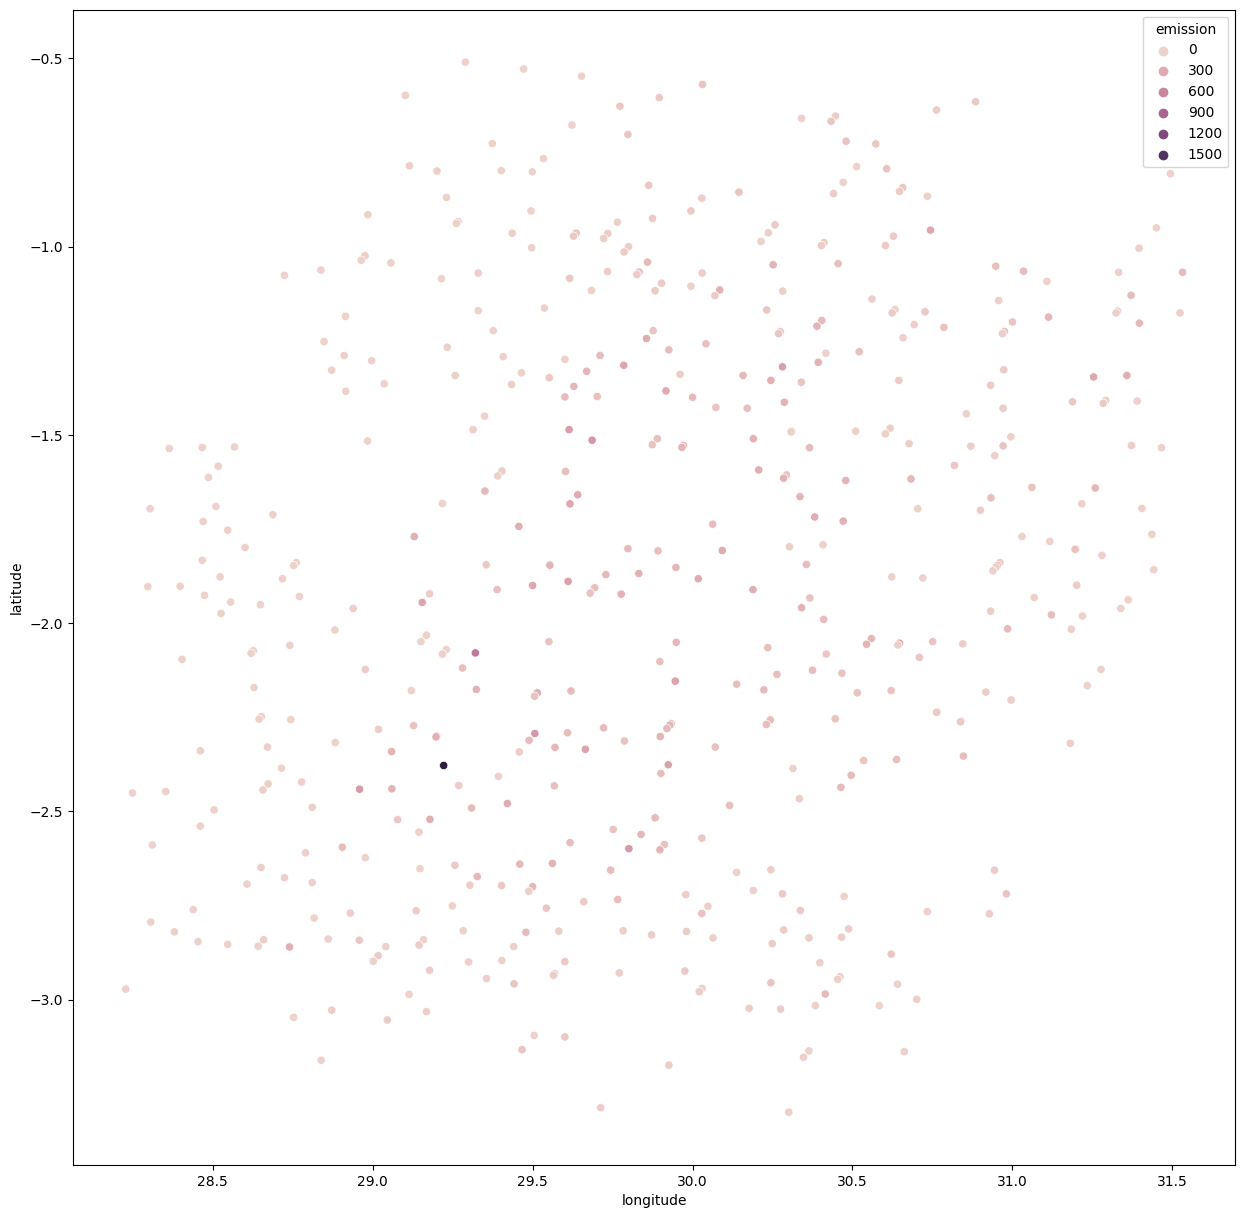

In [47]:
fig, ax = plt.subplots(figsize=(15, 15))

year = 2020
week_no = 15

plot_data = df0[(df0['year'] == year) & (df0['week_no'] == week_no)]


# plot on latitude, longitude columns as x, y, emission as color
sns.scatterplot(x='longitude', y='latitude', hue='emission', data=plot_data, ax=ax, cmap='magma', vmin=0, vmax=1500)
plt.show()

In [ ]:
! pip install keplergl